Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [3]:
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2246, done.
remote: Total 2246 (delta 0), reused 0 (delta 0), pack-reused 2246
Receiving objects: 100% (2246/2246), 8.04 MiB | 10.27 MiB/s, done.
Resolving deltas: 100% (1456/1456), done.


In [0]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [5]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 12.9MB/s 
     |████████████████████████████████| 204kB 21.9MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655250 sha256=f04172f0e0f1fd571c789491fefb0ca7256454748a0cbb37be71d8ddd2d16f97
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5712 sha256=719024bf7d5c9219d6cccf051e4ed5eb6a7ef0aad033621fe7beb196992db6ac
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

In [6]:
!bash ./datasets/download_cyclegan_dataset.sh monet2photo

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./datasets/monet2photo/trainB/2014-01-10 12:46:39.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-02-23 11:45:00.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-05-23 09:38:08.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-01-15 00:48:49.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-12-27 18:15:26.jpg  
  inflating: ./datasets/monet2photo/trainB/2017-01-02 11:16:05.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-08-06 11:08:32.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-12-16 07:43:36.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-03-25 12:57:28.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-05-10 11:44:44.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-03-11 08:01:52.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-08-30 05:26:05.jpg  
  inflating: ./datasets/monet2photo/trainB/2015-10-03 19:00:56.jpg  
  inflating: ./datasets/monet2photo/trainB/2016-06-08 02:40:47.jpg 

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [7]:
!bash ./scripts/download_cyclegan_model.sh monet2photo

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [monet2photo]
for details.

--2020-06-05 14:21:46--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/monet2photo.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.189.73
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’

./checkpoints/monet 100%[===================>]  43.46M  14.0MB/s    in 3.1s    

2020-06-05 14:21:50 (14.0 MB/s) - ‘./checkpoints/monet2photo_pretrained/latest_net_G.pth’ saved [45575747/45575747]



# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [8]:
import visdom

!python -m visdom.server

Checking for scripts.
It's Alive!
INFO:root:Application Started
You can navigate to http://6d58ee9a694c:8097
Traceback (most recent call last):
  File "/usr/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/usr/local/lib/python3.6/dist-packages/visdom/server.py", line 1922, in <module>
    download_scripts_and_run()
  File "/usr/local/lib/python3.6/dist-packages/visdom/server.py", line 1918, in download_scripts_and_run
    main()
  File "/usr/local/lib/python3.6/dist-packages/visdom/server.py", line 1913, in main
    use_frontend_client_polling=FLAGS.use_frontend_client_polling)
  File "/usr/local/lib/python3.6/dist-packages/visdom/server.py", line 1803, in start_server
    ioloop.IOLoop.instance().start()
  File "/usr/local/lib/python3.6/dist-packages/tornado/ioloop.py", line 863, in start
    event_pairs = self._impl.poll(poll_timeout)
KeyboardInterrupt


In [13]:
!python train.py --dataroot ./datasets/monet2photo --name monet2photo --model cycle_gan

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 256                           
                 dataroot: ./datasets/monet2photo        	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                        
              

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [14]:
!python test.py --dataroot datasets/monet2photo/testA --name monet2photo_pretrained --model test --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/monet2photo/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import matplotlib.pyplot as plt

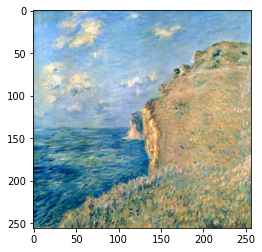

In [22]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00140_real.png')
plt.imshow(img)

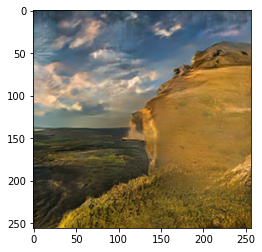

In [20]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00140_fake.png')
plt.imshow(img)

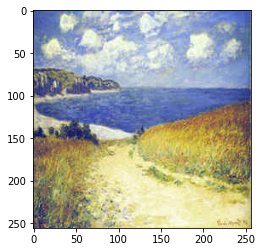

In [24]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00010_real.png')
plt.imshow(img)

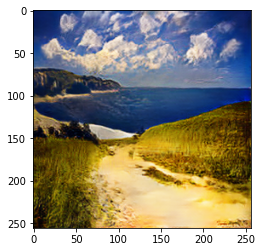

In [23]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00010_fake.png')
plt.imshow(img)

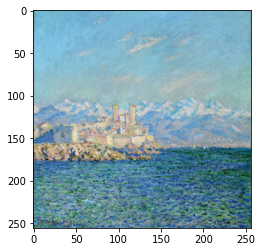

In [26]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00020_real.png')
plt.imshow(img)

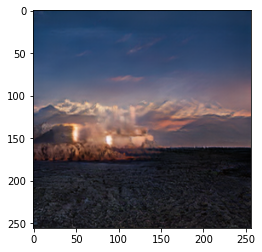

In [27]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00020_fake.png')
plt.imshow(img)

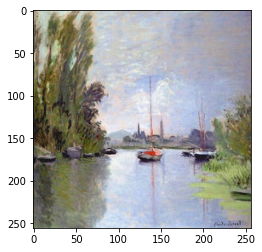

In [29]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00030_real.png')
plt.imshow(img)

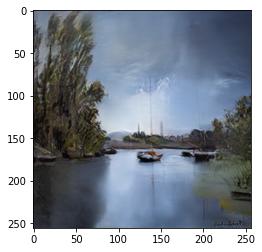

In [28]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00030_fake.png')
plt.imshow(img)

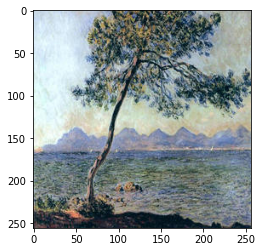

In [30]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00040_real.png')
plt.imshow(img)

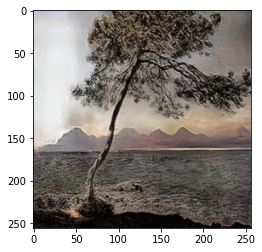

In [31]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00040_fake.png')
plt.imshow(img)

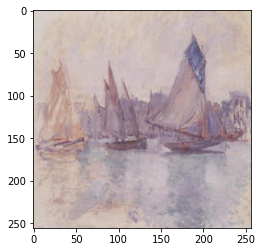

In [32]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00070_real.png')
plt.imshow(img)

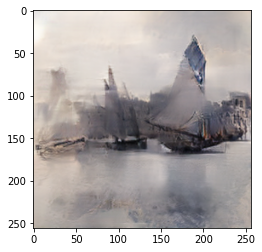

In [33]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00070_fake.png')
plt.imshow(img)

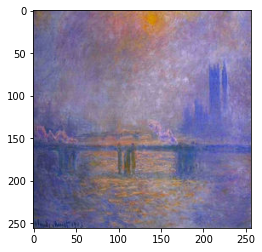

In [34]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00130_real.png')
plt.imshow(img)

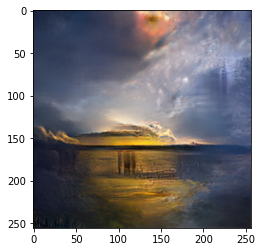

In [35]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00130_fake.png')
plt.imshow(img)

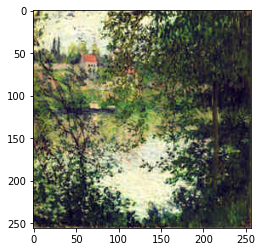

In [36]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00320_real.png')
plt.imshow(img)

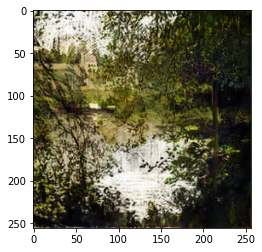

In [38]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00320_fake.png')
plt.imshow(img)

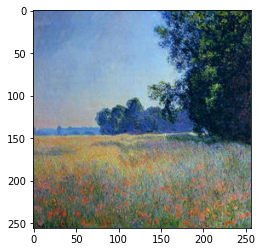

In [40]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00430_real.png')
plt.imshow(img)

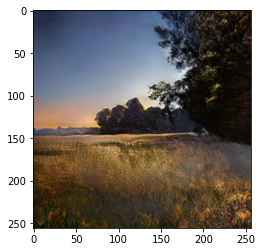

In [39]:
img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00430_fake.png')
plt.imshow(img)